**Helping function that search by a specific lab,room, cafetria, clinic, etc inside each building and return building, number of floor**

In [ ]:
def intraBuilding_search(dict_building,source):
  for building in dict_building:
    all_floors_list=dict_building[building]
    number_floor=0
    for x in range (len(all_floors_list)):
      for y in range (len(all_floors_list[x])):
        if source==all_floors_list[x][y]:
          number_floor=x
          return building,number_floor
  return None

# Reading file that Map each Building to its crossroads available in the map.

In [ ]:
building_map = {}
with open("/content/BuildingsMapping.txt") as data_file:
    for line in data_file:
       line = line.replace('\n','')
       key,val=line.split('-')
       list_values=val.split(',')
       building_map[key] = list_values
print(building_map)

{'Nano Building': ['NB'], 'Nano Building1': ['NB1'], 'Nano Building2': ['NB2'], 'Helmy Building': ['HB'], 'Helmy Building1': ['HB1'], 'Academic Building': ['A'], 'Academic Building A': ['A'], 'Academic Building B': ['B'], 'Academic Building C': ['C'], 'Academic Building D': ['D'], 'Academic Building E': ['E'], 'Helmy Parking': ['HP'], 'Helmy Garden': ['HG'], 'Dorms': ['DCR'], 'Dorms1': ['DCR1'], 'Main Gate': ['MG'], 'One Stop Shop': ['OSB'], 'One Stop Shop1': ['OSB1'], 'Administrative Building': ['ADB'], 'Administrative Building1': ['ADB1'], 'One Stop Gate': ['OSG'], 'Service Gate': ['SG'], 'Dorms Gate': ['DG'], 'Playground': ['PG'], 'Playground1': ['PG1'], 'Service Building': ['SB'], 'Service Building1': ['SB']}


# Reading file that represent Zewail City Map by its roads and crossroads available

In [ ]:
map_dict = {}
with open("/content/ZewailCity_Map.txt") as data_file:
    for line in data_file:
       line = line.replace('\n','')
       key,val=line.split('-')
       list_values=val.split(',')
       end=len(list_values)
       value=[]
       for i in range(0,end,2):
          l=[]
          if i==0:
            list_values[i]=int(list_values[i])
            list_values[i+1]=int(list_values[i+1])
          l.append(list_values[i])
          l.append(list_values[i+1])
          value.append(l)
       map_dict[key] = value


# **Reading Cost File**

In [ ]:
cost_dict = {}
with open("/content/Cost.txt") as data_file:
    for line in data_file:
       line = line.replace('\n','')
       key,val=line.split('-')
       val=float(val)*100
       cost_dict[key] = val

# Reading file that include each laboratory, office and room in the building.

In [ ]:
import more_itertools as mit
Intrabuilding_dict = {}
values=[]

with open("/content/IntraBuildingMovement_map.txt") as data_file:
    for line in data_file:
       line = line.replace('\n','')
       key,val=line.split('-')
       list_values=val.split(',')
       values = list(mit.split_at(list_values, pred=lambda x: set(x) & {'&'}))    
       Intrabuilding_dict[key]=values
       print(key)
       print(values)


NB
[['4d_Electronic_Microscope', 'Communication_Lab', 'Physics_center'], ['NanoScience_Lab', 'MaterialScience_Lab', 'Clean_room', 'lecture_rooms', 'Nano_Technology_Faculty_rooms'], ['CIE_department', 'CIE_Labs', 'Second_Lecture_rooms', 'CIE_Faculty_rooms']]
ADB
[['IT_department', 'Engineering_Authority'], ['Cultural_and_administrative_complex', 'Offices', 'Auditorium', 'Board_Meeting_room']]
AB
[['cafeteria', 'clinic', 'CSAI', 'lecture_rooms_G'], ['lecture_rooms_FF', 'girls_lounge', 'boys_lounge', 'Library', 'TAs_rooms', 'faculty_rooms'], ['lecture_rooms_SF', 'foundation_labs']]
HB
[['Renewable_energy_lab', 'environmettal_lab', 'lecture_rooms_G'], ['FO27', 'Center for Aging and Associated Diseases', 'Center of Excellence for Stem Cells Research and Regenerative Medicine', 'Center for Genomics', 'biomedical_facullty_rooms', 'RAs_rooms'], ['SO24', 'phage_center']]
SB
[['lost_found_room', 'lecture_rooms_G'], ['Engineering Authority', 'lecture_rooms_FF', 'faculty_rooms']]
OSB
[['Registrar'

In [ ]:
class Problem:
    '''
    Abstract base class for problem formulation that supports a heuristic function.
    It declares the expected methods to be used by a search algorithm.
    All the methods declared are just placeholders that throw errors if not overriden by child "concrete" classes!
    '''
    
    def __init__(self):
        '''Constructor that initializes the problem. Typically used to setup the initial state and, if applicable, the goal state.'''
        self.init_state = None
    
    def actions(self, state):
        '''Returns an iterable with the applicable actions to the given state.'''
        raise NotImplementedError
    
    def result(self, state, action):
        '''Returns the resulting state from applying the given action to the given state.'''
        raise NotImplementedError
    
    def goal_test(self, state):
        '''Returns whether or not the given state is a goal state.'''
        raise NotImplementedError
    
    def step_cost(self, state, action):
        '''Returns the step cost of applying the given action to the given state.'''
        raise NotImplementedError

    def heuristic(self, state):
        '''Returns the heuristic value of the given state, i.e., the estimated number of steps to the nearest goal state.'''
        raise NotImplementedError

In [ ]:
class Node:
    '''Node data structure for search space bookkeeping.'''
    
    def __init__(self, state, parent, action, path_cost):
        '''Constructor for the node state with the required parameters.'''
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    @classmethod
    def root(cls, init_state):
        '''Factory method to create the root node.'''
        return cls(init_state, None, None, 0)

    @classmethod
    def child(cls, problem, parent, action):
        '''Factory method to create a child node.'''
        return cls(
            problem.result(parent.state, action),
            parent,
            action,
            parent.path_cost + problem.step_cost(parent.state, action))

def solution(node):
    '''A method to extract the sequence of actions representing the solution from the goal node.'''
    actions = []
    cost = node.path_cost
    while node.parent is not None:
        actions.append(node.action)
        node = node.parent
    actions.reverse()
    return actions, cost

In [ ]:
from shutil import get_terminal_size
terminal_width, _ = get_terminal_size()

_visualizers = {}

def _default_visualizer(_, state):
    '''Generic visualizer for unknown problems.'''
    print(state)

class Visualizer:
    '''Visualization and printing functionality encapsulation.'''

    def __init__(self, problem):
        '''Constructor with the problem to visualize.'''
        self.problem = problem
        self.counter = 0
    
    def visualize(self, frontier):
        '''Visualizes the frontier at every step.'''
        self.counter += 1
        print(f'Frontier at step {self.counter}')
        for node in frontier:
            print()
            _visualizers.get(type(self.problem), _default_visualizer)(self.problem, node.state)
        print('-' * terminal_width)

In [ ]:
from collections import deque
from heapq import heappush, heappop
from itertools import count
import math
counter = count()
def bfs_tree(problem, verbose=False):
    '''Breadth-first tree search implementation.'''
    if problem.goal_test(problem.init_state): return solution(Node.root(problem.init_state))
    frontier = deque([Node.root(problem.init_state)])
    if verbose: visualizer = Visualizer(problem)
    while frontier:
        if verbose: visualizer.visualize(frontier)
        node = frontier.pop()
        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if problem.goal_test(child.state):
                return solution(child)
            frontier.appendleft(child)

def bfs_graph(problem, verbose=False):
    '''Breadth-first graph search implementation.'''
    if problem.goal_test(problem.init_state): return solution(Node.root(problem.init_state))
    frontier = deque([Node.root(problem.init_state)])
    explored = {problem.init_state}
    if verbose: visualizer = Visualizer(problem)
    while frontier:
        if verbose: visualizer.visualize(frontier)
        node = frontier.pop()
        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if child.state not in explored:
                if problem.goal_test(child.state):
                    return solution(child)
                frontier.appendleft(child)
                explored.add(child.state)

def dfs(problem, verbose=False):
   if problem.goal_test(problem.init_state): return solution(Node.root(problem.init_state))
   frontier =  deque([Node.root(problem.init_state)])
   explored = {problem.init_state}
   if verbose: visualizer = Visualizer(problem)
   while frontier:  
        if verbose: visualizer.visualize(frontier)
        node = frontier.pop()
        for action in problem.actions(node.state):
              child = Node.child(problem, node, action)
              if child.state not in explored:
                if problem.goal_test(child.state): return solution(child)
                frontier.append(child)
                explored.add(child.state)

def ids_graph(problem,verbose=False):   
     
     if problem.goal_test(problem.init_state): return solution(Node.root(problem.init_state))
     frontier = deque([Node.root(problem.init_state)])
     explored = {problem.init_state}
     if verbose: visualizer = Visualizer(problem)
     parent_num=0
     Limit=0

     while frontier:
        if verbose: visualizer.visualize(frontier)
        node = frontier.pop()
        node_copy=node
        
        
        while node_copy.parent is not None:
          parent_num=parent_num+1
          node_copy=node_copy.parent

        if parent_num < Limit:
          for action in problem.actions(node.state):
             child = Node.child(problem, node, action)
             if child.state not in explored:
                if problem.goal_test(child.state):
                  return solution(child)
                frontier.append(child)
                explored.add(child.state)

        elif parent_num >=  Limit and len(frontier) !=0 :
          continue

        if len(frontier) == 0:
         Limit+=1
         parent_num=0
         if problem.goal_test(problem.init_state): return solution(Node.root(problem.init_state))
         frontier = deque([Node.root(problem.init_state)])
         explored = {problem.init_state}


# **Defining Class of Problem (Zewail Map)**

In [ ]:
class ZewailMap(Problem):
    '''Zewail Map'''

    def __init__(self, init_state, goal_state,map_dict):
        self.init_state = init_state
        self._goal_state = goal_state
        self.map_dict=map_dict
        
    
    def actions(self, state):
      values=self.map_dict[state]
      actions=[]
      for i in range(1,len(values)):
        action=values[i]
        actions.append(action[0])
      return actions
    
    def result(self, state, action):
        crossroad=self.map_dict[state]
        for i in range(1,len(crossroad)):
          value=crossroad[i]
          if value[0]==action:
            return value[1]
            
    def goal_test(self, state):
        return state == self._goal_state
    
    def step_cost(self, state, action):
      cost=cost_dict[action]
      return cost


    def heuristic(self, state):
       
        euclidean_distance=0
        coordinates_st=self.map_dict[state][0]
        coordinated_goa=self.map_dict[self._goal_state][0]
        # This is an euclidean distance heuristics
        euclidean_distance=math.sqrt(((coordinates_st[0]-coordinated_goa[0])**2+(coordinates_st[1]-coordinated_goa[1])**2))
       
        return euclidean_distance
    
    def heuristic1(self, state):
        manhatan_distance = 0
        coordinates_st=self.map_dict[state][0]
        coordinated_goa=self.map_dict[self._goal_state][0]
        # This is a manhatan distance heuristics
        manhatan_distance=(coordinates_st[0]-coordinated_goa[0])+(coordinates_st[1]-coordinated_goa[1])
       
        return manhatan_distance

    


# **Informed Search**

In [ ]:
class Node_in:
    '''Node data structure for search space bookkeeping.'''
    
    def __init__(self, state, parent, action, path_cost, heuristic):
        '''Constructor for the node state with the required parameters.'''
        self.state = state
        self.parent = parent
        self.action = action
        self.g = path_cost
        self.h = heuristic
        self.f = path_cost + heuristic

    @classmethod
    def root(cls, problem ,ht):                          # where ht is the heuristic type: 0 -> euclidean , 1-> mahathan
        '''Factory method to create the root node.'''
        init_state = problem.init_state
        if ht==0:
          return cls(init_state, None, None, 0, problem.heuristic(init_state))
        else:
          return cls(init_state, None, None, 0, problem.heuristic1(init_state))

    @classmethod
    def child(cls, problem, parent, action,ht):
        '''Factory method to create a child node.'''
        child_state = problem.result(parent.state, action)
        if ht==0:
          return cls(
              child_state,
              parent,
              action,
              parent.g + problem.step_cost(parent.state, action),
              problem.heuristic(child_state))
        else:
          return cls(
              child_state,
              parent,
              action,
              parent.g + problem.step_cost(parent.state, action),
              problem.heuristic1(child_state))

def solution_in(node):
    '''A method to extract the sequence of actions representing the solution from the goal node.'''
    actions = []
    cost = node.g
    while node.parent is not None:
        actions.append(node.action)
        node = node.parent
    actions.reverse()
    return actions, cost

In [ ]:
from shutil import get_terminal_size
terminal_width, _ = get_terminal_size()

_visualizers = {}

def _default_visualizer(_, state):
    '''Generic visualizer for unknown problems.'''
    print(state)

class Visualizer1:
    '''Visualization and printing functionality encapsulation.'''

    def __init__(self, problem):
        '''Constructor with the problem to visualize.'''
        self.problem = problem
        self.counter = 0
    
    def visualize(self, frontier):
        '''Visualizes the frontier at every step.'''
        self.counter += 1
        print(f'Frontier at step {self.counter}')
        for _, _, node in frontier:
            print()
            _visualizers.get(type(self.problem), _default_visualizer)(self.problem, node.state)
        print('-' * terminal_width)

In [ ]:
from heapq import heappush, heappop
from itertools import count

counter = count()

def greedy_best_first(problem,ht, verbose=False):
    '''Greedy best-first search implementation.'''
    frontier = [(None, None, Node_in.root(problem,ht))]
    explored = set()
    if verbose: visualizer = Visualizer1(problem)
    while frontier:
        if verbose: visualizer.visualize(frontier)
        _, _, node = heappop(frontier)
        if node.state in explored: continue
        if problem.goal_test(node.state):
            return solution_in(node)
        explored.add(node.state)
        for action in problem.actions(node.state):
            child = Node_in.child(problem, node, action,ht)
            if child.state not in explored:
                heappush(frontier, (child.h, next(counter), child))


def A_star(problem,ht, verbose=False):
    '''Greedy best-first search implementation.'''
    frontier = [(None, None, Node_in.root(problem,ht))]
    explored = set()
    if verbose: visualizer = Visualizer1(problem)
    while frontier:
        if verbose: visualizer.visualize(frontier)
        _, _, node = heappop(frontier)
        if node.state in explored: continue
        if problem.goal_test(node.state):
            return solution_in(node)
        explored.add(node.state)
        for action in problem.actions(node.state):
            child = Node_in.child(problem, node, action,ht)
            if child.state not in explored:
                heappush(frontier, (child.f, next(counter), child))

# **Local Search Part** : Hill Climbing

In [ ]:
def hill_climbing(problem, verbose=False):
    '''Hill climbing search implementation.'''
    current_state = problem.init_state
    current_value = problem.heuristic(current_state)
    if verbose: visualizer = Visualizer(problem)
    while True:
        if verbose: visualizer.visualize([current_state])
        next_state, next_value = None, None
        for action in problem.actions(current_state):
            new_state = problem.result(current_state, action)
            new_value = problem.heuristic(new_state)
            if next_value is None or next_value > new_value:
                next_state, next_value = new_state, new_value
        if current_value <= next_value: return current_state
        current_state, current_value = next_state, next_value

# **Simulated Annealing**

In [ ]:
from random import choice, random
from math import exp
from itertools import count

def simulated_annealing(problem, schedule, verbose=False):
    '''Simulated annealing search implementation.'''
    current_state = problem.init_state
    current_value = problem.heuristic(current_state)
    if verbose: visualizer = Visualizer(problem)
    for t in count():
        if verbose: visualizer.visualize([current_state])
        T = schedule(t)  # A function that determines the "temperature" (acceptability of a bad state) as a function of the step count
        if current_value == 0 or T == 0: return current_state  # Return if a goal state is found or if the temperature hits 0
        next_states = [problem.result(current_state, action) for action in problem.actions(current_state)]  # Generate all possible next states
        while True:  # Repeat the following till the current state is updated
            next_state = choice(next_states)  # Choose a random next state
            next_value = problem.heuristic(next_state)
            delta = current_value - next_value
            if delta > 0 or random() < exp(delta / T):  # Accept the randomly chosen state immediately if it is better than the current state or with a probability (exponentially) proportional to the temperature and how bad it is
                current_state, current_value = next_state, next_value

                break

In [137]:
#@title Enter intial and end point 
Source='Main Gate' #@param ["4D_Electronic_Microscope","Communication_Lab","Physics_center","NanoScience_Lab","MaterialScience_Lab","Clean_room-HB","lecture_rooms-HB","Nano_Technology_Faculty_rooms","CIE_department","CIE_Labs","Second_Lecture_rooms-NB","CIE_Faculty_rooms","IT_department","Engineering_Authority","Cultural_and_administrative_complex","Offices-AdministrativeBuilding","Auditorium","Board_Meeting_room","cafeteria","clinic","CSAI","Ground_lecture_rooms-AB","First_lecture_rooms-AB","girls_lounge","boys_lounge","Library","TAs_rooms-AB","faculty_rooms_AB","Second_lecture_rooms_AB","foundation_labs","Renewable_energy_lab","environmental_lab","Ground_lecture_rooms_HB","FO27_HB","Center for Aging and Associated Diseases","Center of Excellence for Stem Cells Research and Regenerative Medicine","Center for Genomics","biomedical_faculty_rooms","RAs_rooms","SO24-HB","phage_center","lost_found_room-SB","Ground_lecture_rooms-SB","Engineering Authority_SB","First_lecture_rooms_SB","faculty_rooms_SB","Registrar","valley_of_science_and_technology","Nano Building","Nano Building1","Nano Building2","Helmy Building","Helmy Building1","Academic Building","Academic Building A","Academic Building B","Academic Building C","Academic Building D","Academic Building E","Helmy Parking","Helmy Garden","Dorms","Dorms1","Main Gate","One Stop Shop","One Stop Shop1","Administrative Building","Administrative Building1","One Stop Gate","Service Gate","Dorms Gate","Playground","Playground1"]
Destination='Academic Building C' #@param ["4D_Electronic_Microscope","Communication_Lab","Physics_center","NanoScience_Lab","MaterialScience_Lab","Clean_room-HB","lecture_rooms-HB","Nano_Technology_Faculty_rooms","CIE_department","CIE_Labs","Second_Lecture_rooms-NB","CIE_Faculty_rooms","IT_department","Engineering_Authority","Cultural_and_administrative_complex","Offices-AdministrativeBuilding","Auditorium","Board_Meeting_room","cafeteria","clinic","CSAI","Ground_lecture_rooms-AB","First_lecture_rooms-AB","girls_lounge","boys_lounge","Library","TAs_rooms-AB","faculty_rooms_AB","Second_lecture_rooms_AB","foundation_labs","Renewable_energy_lab","environmental_lab","Ground_lecture_rooms_HB","FO27_HB","Center for Aging and Associated Diseases","Center of Excellence for Stem Cells Research and Regenerative Medicine","Center for Genomics","biomedical_faculty_rooms","RAs_rooms","SO24-HB","phage_center","lost_found_room-SB","Ground_lecture_rooms-SB","Engineering Authority_SB","First_lecture_rooms_SB","faculty_rooms_SB","Registrar","valley_of_science_and_technology","Nano Building","Nano Building1","Nano Building2","Helmy Building","Helmy Building1","Academic Building","Academic Building A","Academic Building B","Academic Building C","Academic Building D","Academic Building E","Helmy Parking","Helmy Garden","Dorms","Dorms1","Main Gate","One Stop Shop","One Stop Shop1","Administrative Building","Administrative Building1","One Stop Gate","Service Gate","Dorms Gate","Playground","Playground1"]

Algorithm='Greedy-Best_first' #@param ["BFS","DFS","IDS","Greedy-Best_first","A*","Hill Climbing","Simulated Annealing"]
if Algorithm=="Greedy-Best_first" or Algorithm=="A*":
  Heuristic='Euclidean' #@param ["Euclidean","Manhatan"]

print(Source)
print(Destination)
print(Algorithm)


Main Gate
Academic Building C
Greedy-Best_first


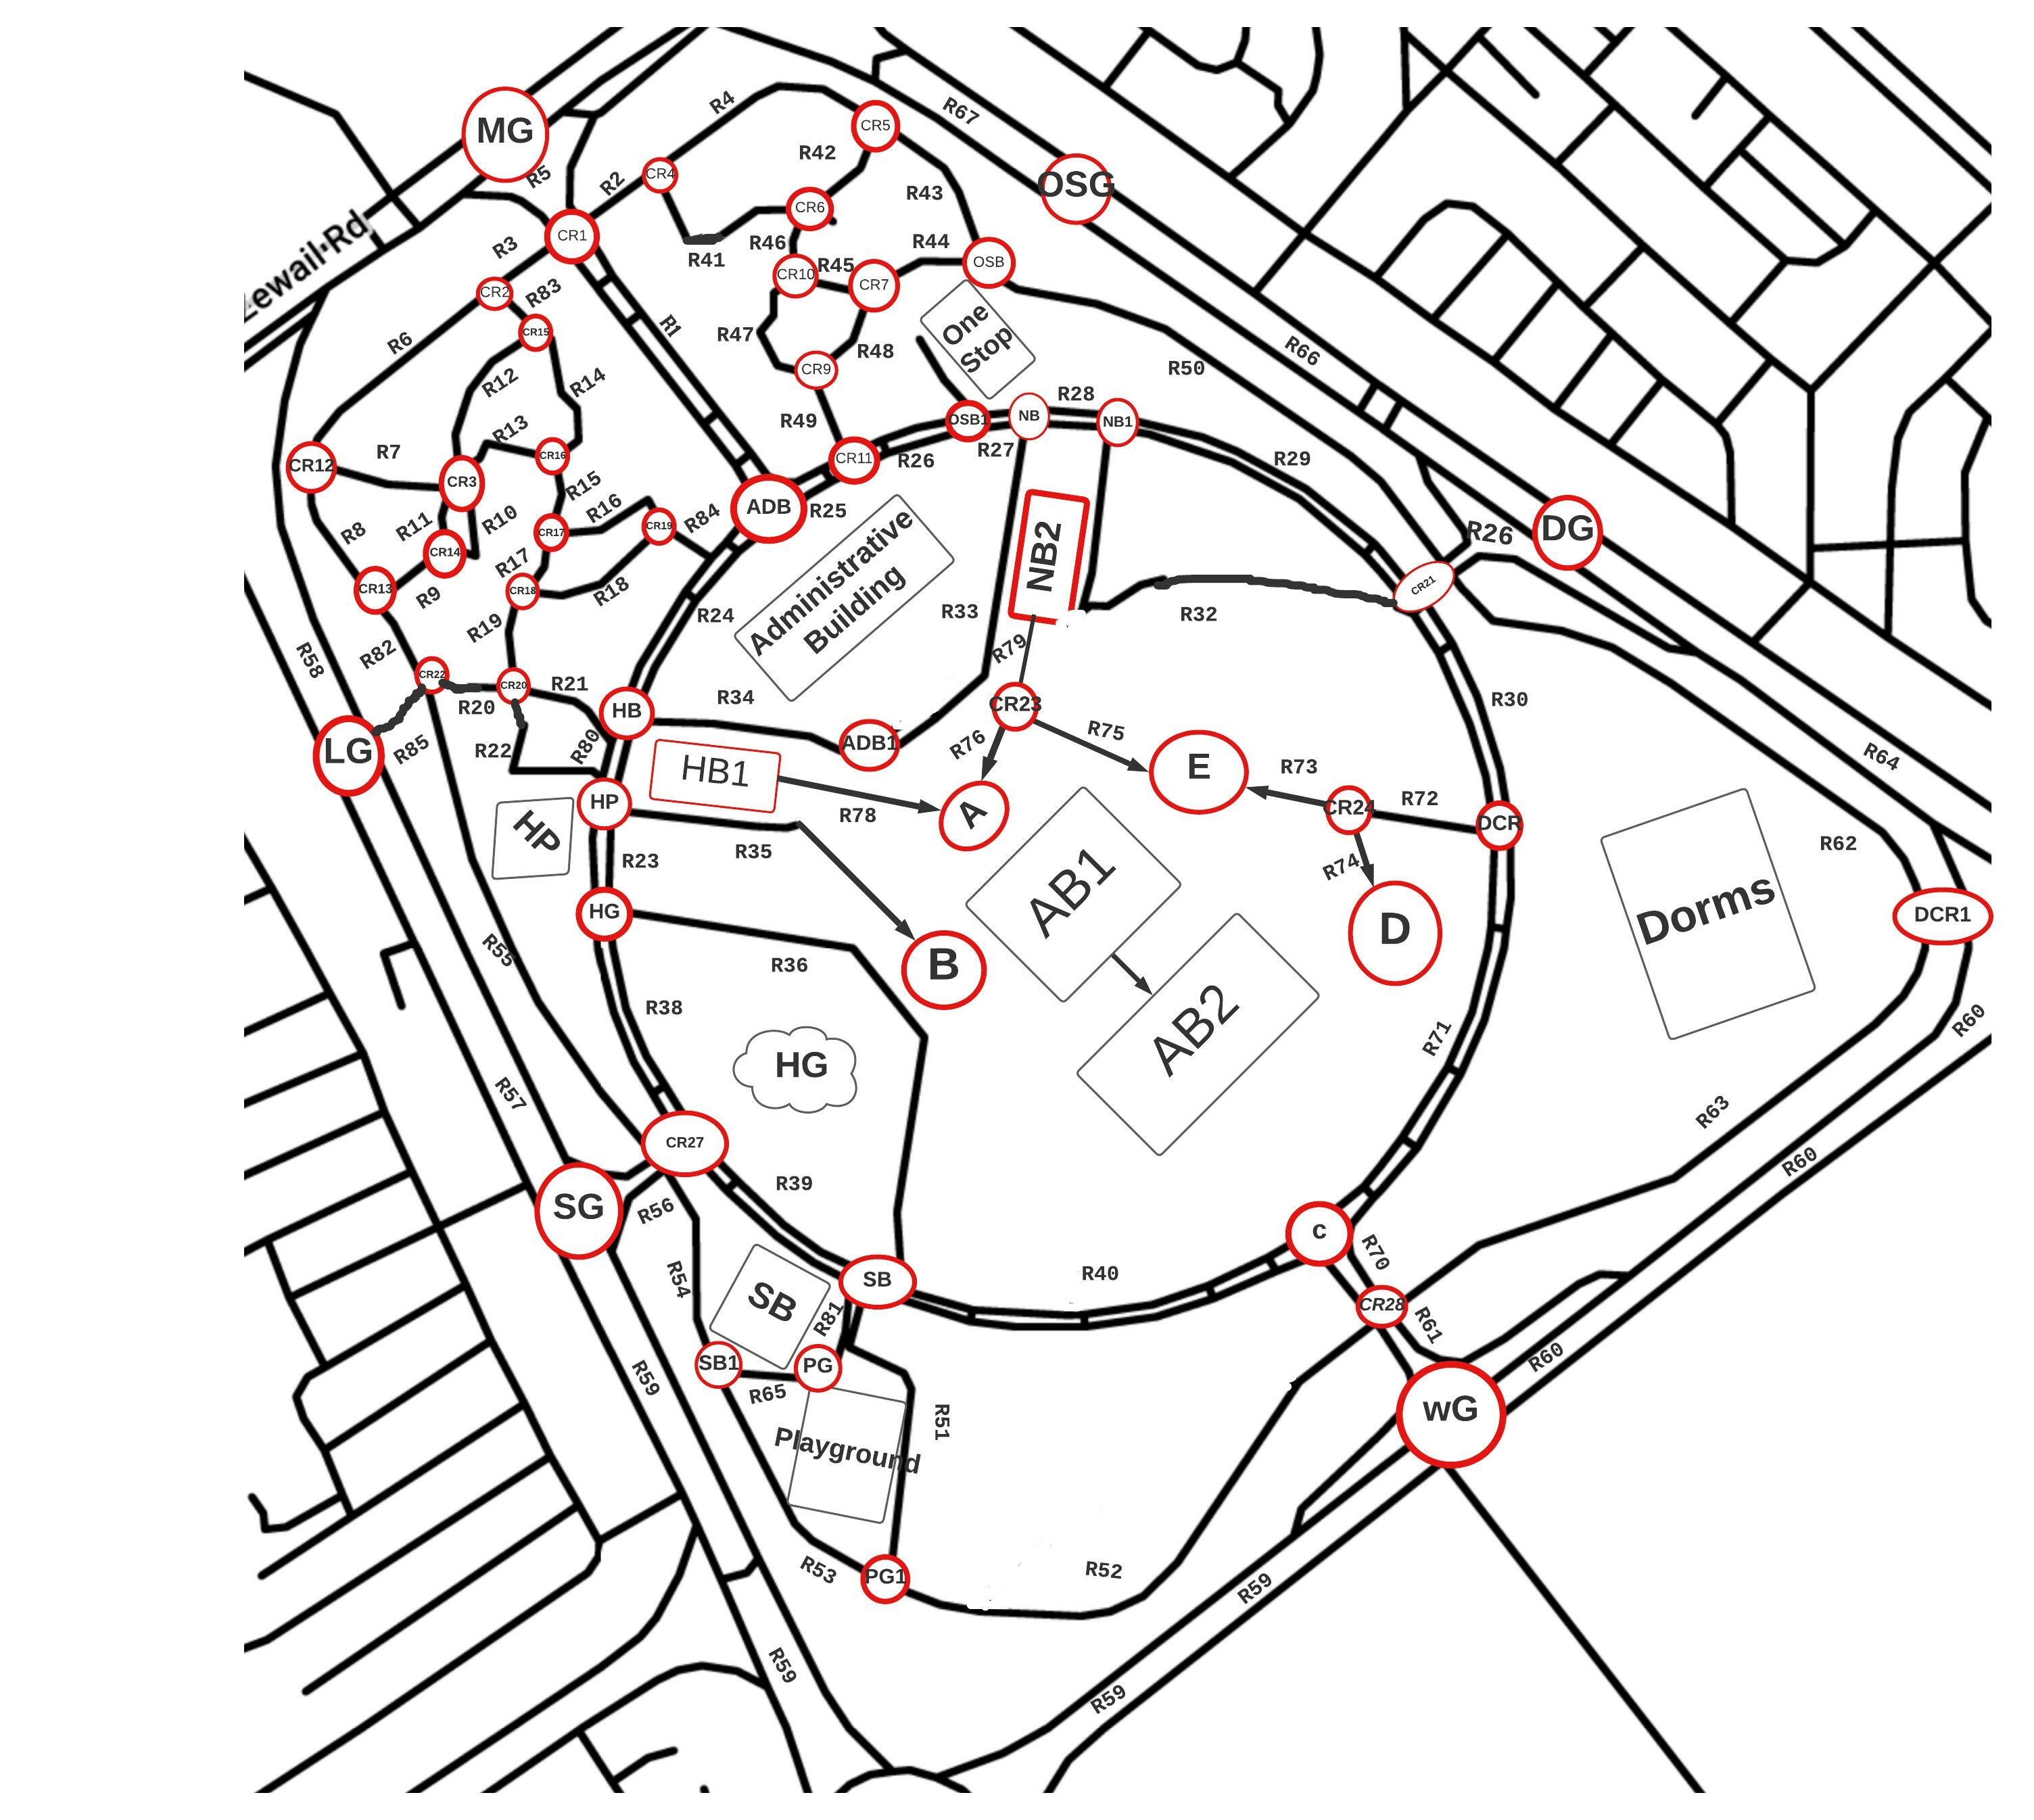

In [138]:
# handling Cases of Source
intialState=building_map.get(Source)

if(intialState==None):
  place_in_building, floor=intraBuilding_search(Intrabuilding_dict,Source)
  print(str(Source)+" is in " +str(place_in_building)+ " Number of Floor  "+str(floor))
  intialState=building_map.get(place_in_building)

# handling Cases of Destination
GoalState=building_map.get(Destination)
if(GoalState==None):
  final_place ,floor2=intraBuilding_search(Intrabuilding_dict,Destination)
  print("To reach " +str(final_place)+ " Number of Floor"+str(floor2))
  GoalState=building_map[final_place]

problem = ZewailMap(intialState[0],  GoalState[0],map_dict)
if Algorithm=="BFS":
  print("From ",Source," To ",Destination, ": ",bfs_graph(problem, verbose=False))
if Algorithm=="DFS":
  print("From ",Source," To ",Destination, ": ",dfs(problem, verbose=False))
if Algorithm=="IDS":
  print("From " ,Source," To ",Destination,": ",ids_graph(problem, verbose=False))
if Algorithm=="Greedy-Best_first" and  Heuristic=="Manhatan":
  print("From ",Source," To ",Destination, ": ",greedy_best_first(problem,1, verbose=False))
if Algorithm=="Greedy-Best_first" and  Heuristic=="Euclidean":
  print("From " ,Source," To ",Destination, ": ",greedy_best_first(problem,0, verbose=False))
if Algorithm=="A*" and  Heuristic=="Manhatan":
  print("From ",Source," To ",Destination, ": ",A_star(problem,1, verbose=False))
if Algorithm=="A*" and  Heuristic=="Euclidean":
  print("From " ,Source," To ",Destination,": ", A_star(problem,0, verbose=False))
if Algorithm=="Hill Climbing":
  print("From " ,Source," To ",Destination,": ",hill_climbing(problem, verbose=False)) # using only manhatan distance
if Algorithm=="Simulated Annealing":
  print("From " ,Source," To ",Destination, ": ",simulated_annealing(problem, lambda t: exp(-t), verbose=False))  

From  Main Gate  To  Academic Building C :  (['R67', 'R66', 'R96', 'R30', 'R71'], 5920.0)


In [ ]:
greedy_best_first(problem,0 ,verbose=True)[0]


In [ ]:
A_star(problem,0 ,verbose=True)

Frontier at step 1

MG
--------------------------------------------------------------------------------
Frontier at step 2

CR1

OSG

LG
--------------------------------------------------------------------------------
Frontier at step 3

CR2

CR4

OSG

LG

ADB
--------------------------------------------------------------------------------
Frontier at step 4

CR15

ADB

CR4

LG

CR12

OSG
--------------------------------------------------------------------------------
Frontier at step 5

CR4

ADB

CR16

LG

CR12

OSG

CR3
--------------------------------------------------------------------------------
Frontier at step 6

CR16

CR6

CR3

ADB

CR12

OSG

CR5

LG
--------------------------------------------------------------------------------
Frontier at step 7

CR6

ADB

CR3

CR17

CR12

OSG

CR5

LG

CR3
--------------------------------------------------------------------------------
Frontier at step 8

ADB

CR10

CR3

CR17

CR12

OSG

CR5

LG

CR3

CR5
---------------------------------

(['R58', 'R57', 'R56', 'R39', 'R40'], 5650.0)

In [ ]:
bfs_graph(problem, verbose=True)

Frontier at step 1

MG
--------------------------------------------------------------------------------
Frontier at step 2

LG

CR1

OSG
--------------------------------------------------------------------------------
Frontier at step 3

DG

LG

CR1
--------------------------------------------------------------------------------
Frontier at step 4

ADB

CR4

CR2

DG

LG
--------------------------------------------------------------------------------
Frontier at step 5

CR22

SG

ADB

CR4

CR2

DG
--------------------------------------------------------------------------------
Frontier at step 6

CR21

DCR1

CR22

SG

ADB

CR4

CR2
--------------------------------------------------------------------------------
Frontier at step 7

CR15

CR12

CR21

DCR1

CR22

SG

ADB

CR4
--------------------------------------------------------------------------------
Frontier at step 8

CR6

CR5

CR15

CR12

CR21

DCR1

CR22

SG

ADB
--------------------------------------------------------------------

(['R67', 'R66', 'R64', 'R63', 'R70'], 7550.0)

In [ ]:
dfs(problem, verbose=True)

Frontier at step 1

MG
--------------------------------------------------------------------------------
Frontier at step 2

OSG

CR1

LG
--------------------------------------------------------------------------------
Frontier at step 3

OSG

CR1

SG

CR22
--------------------------------------------------------------------------------
Frontier at step 4

OSG

CR1

SG

CR13

CR20

CR27
--------------------------------------------------------------------------------
Frontier at step 5

OSG

CR1

SG

CR13

CR20

HG

SB

SB1
--------------------------------------------------------------------------------
Frontier at step 6

OSG

CR1

SG

CR13

CR20

HG

SB

PG

PG1
--------------------------------------------------------------------------------
Frontier at step 7

OSG

CR1

SG

CR13

CR20

HG

SB

PG

CR28
--------------------------------------------------------------------------------


(['R58', 'R85', 'R55', 'R54', 'R53', 'R52', 'R70'], 7200.0)

In [ ]:
ids_graph(problem, verbose=True)

Frontier at step 1

MG
--------------------------------------------------------------------------------
Frontier at step 2

MG
--------------------------------------------------------------------------------
Frontier at step 3

OSG

CR1

LG
--------------------------------------------------------------------------------
Frontier at step 4

OSG

CR1
--------------------------------------------------------------------------------
Frontier at step 5

OSG
--------------------------------------------------------------------------------
Frontier at step 6

MG
--------------------------------------------------------------------------------
Frontier at step 7

OSG

CR1

LG
--------------------------------------------------------------------------------
Frontier at step 8

OSG

CR1

SG

CR22
--------------------------------------------------------------------------------
Frontier at step 9

OSG

CR1

SG
--------------------------------------------------------------------------------
Frontier at

(['R58', 'R85', 'R55', 'R54', 'R53', 'R52', 'R70'], 7200.0)

In [ ]:
%prun bfs_graph(problem, verbose=True)

Frontier at step 1

MG
--------------------------------------------------------------------------------
Frontier at step 2

LG

CR1

OSG
--------------------------------------------------------------------------------
Frontier at step 3

DG

LG

CR1
--------------------------------------------------------------------------------
Frontier at step 4

ADB

CR4

CR2

DG

LG
--------------------------------------------------------------------------------
Frontier at step 5

CR22

SG

ADB

CR4

CR2

DG
--------------------------------------------------------------------------------
Frontier at step 6

CR21

DCR1

CR22

SG

ADB

CR4

CR2
--------------------------------------------------------------------------------
Frontier at step 7

CR15

CR12

CR21

DCR1

CR22

SG

ADB

CR4
--------------------------------------------------------------------------------
Frontier at step 8

CR6

CR5

CR15

CR12

CR21

DCR1

CR22

SG

ADB
--------------------------------------------------------------------

In [ ]:
%prun dfs(problem, verbose=True)

Frontier at step 1

MG
--------------------------------------------------------------------------------
Frontier at step 2

OSG

CR1

LG
--------------------------------------------------------------------------------
Frontier at step 3

OSG

CR1

SG

CR22
--------------------------------------------------------------------------------
Frontier at step 4

OSG

CR1

SG

CR13

CR20

CR27
--------------------------------------------------------------------------------
Frontier at step 5

OSG

CR1

SG

CR13

CR20

HG

SB

SB1
--------------------------------------------------------------------------------
Frontier at step 6

OSG

CR1

SG

CR13

CR20

HG

SB

PG

PG1
--------------------------------------------------------------------------------
Frontier at step 7

OSG

CR1

SG

CR13

CR20

HG

SB

PG

CR28
--------------------------------------------------------------------------------
 

In [ ]:
%prun ids_graph(problem, verbose=True)

Frontier at step 1

MG
--------------------------------------------------------------------------------
Frontier at step 2

MG
--------------------------------------------------------------------------------
Frontier at step 3

OSG

CR1

LG
--------------------------------------------------------------------------------
Frontier at step 4

OSG

CR1
--------------------------------------------------------------------------------
Frontier at step 5

OSG
--------------------------------------------------------------------------------
Frontier at step 6

MG
--------------------------------------------------------------------------------
Frontier at step 7

OSG

CR1

LG
--------------------------------------------------------------------------------
Frontier at step 8

OSG

CR1

SG

CR22
--------------------------------------------------------------------------------
Frontier at step 9

OSG

CR1

SG
--------------------------------------------------------------------------------
Frontier at

In [ ]:
%prun A_star(problem,1, verbose=True)

Frontier at step 1

MG
--------------------------------------------------------------------------------
Frontier at step 2

CR1

OSG

LG
--------------------------------------------------------------------------------
Frontier at step 3

CR2

CR4

LG

OSG

ADB
--------------------------------------------------------------------------------
Frontier at step 4

CR4

CR12

CR15

OSG

ADB

LG
--------------------------------------------------------------------------------
Frontier at step 5

CR15

CR12

LG

OSG

ADB

CR5

CR6
--------------------------------------------------------------------------------
Frontier at step 6

LG

CR12

CR3

CR16

ADB

CR5

CR6

OSG
--------------------------------------------------------------------------------
Frontier at step 7

CR12

CR16

CR3

OSG

ADB

CR5

CR6

SG

CR22
--------------------------------------------------------------------------------
Frontier at step 8

CR16

CR3

CR3

ADB

CR13

CR5

CR6

SG

OSG

CR22
--------------------------------

In [ ]:
%prun greedy_best_first(problem,1, verbose=True)

## Bonus:

In [ ]:
!pip install gmplot
import gmplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 164 kB 4.9 MB/s 


In [ ]:
road_lat_lang = {
'R24':[[29.941992, 29.942475, 29.942833, 29.943354], [31.063987, 31.064228, 31.064486, 31.065038]],
'R38':[[29.939472, 29.939896, 29.940314, 29.940900], [31.064475, 31.064169, 31.063960, 31.063842]],
'R39':[[29.938566, 29.938812, 29.939091, 29.939472], [31.065827, 31.065301, 31.064888, 31.064475]],
'R30':[[29.942810, 29.942331, 29.941936, 29.941383], [31.069485, 31.069872, 31.070043, 31.070167]],
'R29':[[29.943893, 29.943707, 29.943419, 29.943149, 29.942810], [31.067409, 31.068192, 31.068793, 31.069174, 31.069485]],
'R54':[[29.939467, 29.938959, 29.938433, 29.938050], [31.064413, 31.064512, 31.064512, 31.064689]],
'R53':[[29.938050, 29.937132, 29.936787], [31.064689, 31.065197, 31.065848]],
'R51':[[29.936787, 29.938002, 29.938146], [31.065859, 31.066003, 31.065495]],
'R78':[[29.941630, 29.941931], [31.065365, 31.066357]],
'R4':[[29.945411, 29.945871, 29.945927, 29.945880, 29.945685], [31.064210, 31.064945, 31.065202, 31.065460, 31.065792]],
'R6':[[29.944686, 29.943937, 29.943626], [31.063078, 31.062010, 31.061785]],
'R41':[[29.945178, 29.945151, 29.944937, 29.945411], [31.065288, 31.064945, 31.064494, 31.064210]],
'R43':[[29.945685, 29.945350, 29.944853], [31.065792, 31.066323, 31.066533]],
'R22':[[29.941623, 29.941742, 29.941749, 29.942034, 29.942237], [31.063873, 31.063779, 31.063226, 31.063312, 31.063229]],
'R58':[[29.945253, 29.944616, 29.944068, 29.943426, 29.942957, 29.942032], [31.062928, 31.061833, 31.061646, 31.061544, 31.061678, 31.062161]],
'R67':[[29.945239, 29.946299, 29.945746, 29.945276], [31.066946, 31.064639, 31.063743, 31.062960]],
'R50':[[29.944853, 29.944690, 29.944504, 29.943538, 29.942915], [31.066516, 31.066736, 31.067691, 31.069290, 31.069708]],
'R62':[[29.942892, 29.942663, 29.942510, 29.941352, 29.940806], [31.069691, 31.070122, 31.070884, 31.072839, 31.073291]],
'R63':[[29.940806, 29.940462, 29.939256, 29.938845, 29.938424], [31.073291, 31.073082, 31.071381, 31.070023, 31.069338]],
'R52':[[29.936787, 29.936605, 29.936596, 29.936873, 29.938127, 29.938414], [31.065848, 31.066522, 31.067295, 31.067880, 31.068951, 31.069338]],
'R40':[[29.938929, 29.938575, 29.938422, 29.938389, 29.938436, 29.938566], [31.068938, 31.068150, 31.067559, 31.066953, 31.066395, 31.065827]],
'R71':[[29.941383, 29.940807, 29.940249, 29.939872, 29.939435, 29.938929], [31.070167, 31.070172, 31.070011, 31.069823, 31.069501, 31.068938]],
'R59':[[29.939342, 29.936002, 29.935639, 29.935610, 29.937859], [31.063606, 31.065462, 31.065859, 31.066279, 31.069857]],
'R36':[[29.940892, 29.940653, 29.940108, 29.939036, 29.938558], [31.063905, 31.065605, 31.066124, 31.065903, 31.065970]],
'R5':[[29.945262, 29.945188, 29.945030], [31.062928, 31.063335, 31.063625]],
'R35':[[29.941513, 29.941397, 29.940804], [31.063867, 31.065254, 31.065809]],
'R79':[[29.942858, 29.942259], [31.066908, 31.066757]],
'R55':[[29.939438, 29.939638, 29.940428, 29.941213, 29.942287], [31.064414, 31.063995, 31.063362, 31.062933, 31.062606]],
'R83':[[29.944430, 29.944686], [31.063389, 31.063078]],
'R11':[[29.943115, 29.943296, 29.943477], [31.062751, 31.062713, 31.062794]],
'R27':[[29.943889, 29.943912], [31.066487, 31.066841]],
'R46':[[29.944751, 29.944960, 29.945178], [31.065207, 31.065191, 31.065288]],
'R45':[[29.944751, 29.944676], [31.065218, 31.065706]],
'R25':[[29.943438, 29.943661], [31.065065, 31.065559]],
'R84':[[29.943226, 29.943142, 29.943361], [31.064279, 31.064617, 31.065030]],
'R10':[[29.943477, 29.943361, 29.943068, 29.943119], [31.062794, 31.062922, 31.062949, 31.062751]],
'R9':[[29.942771, 29.943115], [31.062257, 31.062751]],
'R15':[[29.943649, 29.943417, 92.943203], [31.063518, 31.063571, 31.063486]],
'R16':[[29.943226, 29.943384, 29.943226, 92.943203], [31.064279, 31.064178, 31.063856, 31.063486]],
'R13':[[29.943463, 29.943714, 29.943645], [31.062799, 31.063030, 31.063512]],
'R82':[[29.942236, 29.942496, 29.942769], [31.062629, 31.062478, 31.062267]],
'R80':[[29.941606, 29.941992], [31.063879, 31.063987]],
'R20':[[29.942244, 29.942248], [31.063224, 31.062624]],
'R21':[[29.942237, 29.942140, 29.941980], [31.063229, 31.063698, 31.063974]],
'R85':[[29.942248, 29.942061], [31.062624, 31.062129]],
'R7':[[29.943621, 29.943477, 29.943463], [31.061801, 31.062338, 31.062799]],
'R8':[[29.942766, 29.943259, 29.943621], [31.062262, 31.061833, 31.061801]],
'R75':[[29.941895, 29.942183, 29.941986, 29.942259], [31.067939, 31.067594, 31.067167, 31.066757]],
'R70':[[29.938424, 29.938921], [31.069338, 31.068907]],
'R28':[[29.943912, 29.943893], [31.066841, 31.067409]],
'R26':[[29.943661, 29.943889], [31.065559, 31.066487]],
'R14':[[29.943645, 29.943761, 29.943942, 29.944054, 29.944370, 29.944430], [31.063512, 31.063684, 31.063668, 31.063561, 31.063502, 31.063389]],
'R12':[[29.944430, 29.944230, 29.944068, 29.943798, 29.943491], [31.063389, 31.063067, 31.062906, 31.062820, 31.062794]],
'R3':[[29.945030, 29.944686], [31.063636, 31.063078]],
'R2':[[29.945039, 29.945392], [31.063630, 31.064215]],
'R49':[[29.943640, 29.944165], [31.065583, 31.065331]],
'R42':[[29.945685, 29.945378, 29.945174], [31.065792, 31.065653, 31.065299]],
'R48':[[29.944676, 29.944360, 29.944160], [31.065706, 31.065615, 31.065326]],
'R47':[[29.944165, 29.944216, 29.944416, 29.944523, 29.944667, 29.944751], [31.065331, 31.065079, 31.064971, 31.065041, 31.065063, 31.065218]],
'R56':[[29.939345, 29.939252, 29.939438], [31.063620, 31.063984, 31.064414]],
'R81':[[29.938060, 29.938625], [31.065462, 31.065672]],
'R65':[[29.938050, 29.938060], [31.064689, 31.065462]],
'R23':[[29.940900, 29.941174, 29.941606], [31.063842, 31.063826, 31.063879]],
'R44':[[29.944853, 29.944839, 29.944681], [31.066533, 31.066119, 31.065717]],
'R76':[[29.941973, 29.942259], [31.066339, 31.066757]],
'R73':[[29.941895, 29.941499], [31.067939, 31.069091]],
'R74':[[29.940977, 29.941499], [31.069267, 31.069091]],
'R72':[[29.941347, 29.941499], [31.070174, 31.069091]],
'R1':[[29.944990, 29.943549], [31.063692, 31.064904]],
'R17':[[29.942859, 29.942994, 92.943203], [31.063314, 31.063437, 31.063486]],
'R18':[[29.942859, 29.942817, 92.942915, 21.943226], [31.063314, 31.063571, 31.063893, 31.064279]],
'R19':[[29.942859, 29.942599, 92.942255], [31.063314, 31.063180, 31.063223]],
'R32':[[29.943861, 29.942741, 29.942908, 29.942777], [31.067424, 31.067243, 31.067816, 31.069542]],
'R33':[[29.943902, 29.942330, 29.941813], [31.066833, 31.066552, 31.065681]],
'R34':[[29.942057, 29.941945, 29.941813], [31.064078, 31.065318, 31.065681]],
'R57':[[29.942032, 29.939345], [31.062161, 31.063620]],
'R60':[[29.937859, 29.940251, 29.940825], [31.069857, 31.073347, 31.073336]],
'R61':[[29.938424, 29.937859], [31.069338, 31.069857]],
'R64':[[29.940825, 29.941381, 29.943601], [31.073336, 31.073247, 31.069658]],
'R66':[[29.943658, 29.945239], [31.069612, 31.066946]],
'R96': [[29.942915, 29.943138, 29.943658], [31.069708, 31.069934, 31.069612]]}

In [139]:
bath_extracted = solution
ghgh = gmplot.GoogleMapPlotter(29.941489, 31.066708, 17)
for i in bath_extracted:
  lat = road_lat_lang[i][0]
  lang = road_lat_lang[i][1]
  ghgh.scatter(lat, lang, '#ff000', size=10, marker=False)
  ghgh.plot(lat, lang, 'blue', edge_width=10)
ghgh.draw("map13.html")